In [1]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 944.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199770 sha256=54166b55ff4c6f519f8ebd994e01ca1e9bc6775ff48a76fb3ff4ee2f0b79b688
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [2]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import fasttext
import matplotlib.pyplot as plt


In [3]:
# Install the 'fasttext' library
# !pip install fasttext

# Download the pre-trained FastText model (English, 300 dimensions)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

# Unzip the downloaded model file
!gzip -d cc.en.300.bin.gz


--2023-12-13 08:07:16--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.34, 3.162.163.11, 3.162.163.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   136MB/s    in 30s     

2023-12-13 08:07:47 (142 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [4]:
model = fasttext.load_model('/content/cc.en.300.bin')


In [5]:
data=pd.read_csv('Hindustan_Clean.csv')

In [6]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.210280,3.635514,0.971963,1.514019,2.780374
std,2.24135,2.162135,1.893326,1.570817,0.913724,0.912763,1.921802
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,10.000000,9.000000,4.000000,5.000000,11.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7c4451001870>,
 'caps': [<matplotlib.lines.Line2D at 0x7c4451001db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c44510015d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c44510022f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c4451002590>],
 'means': []}

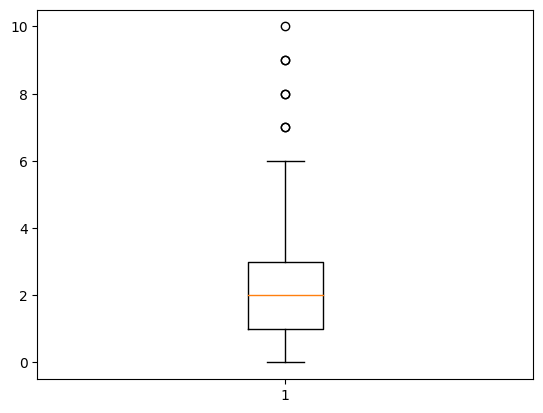

In [7]:
plt.boxplot(data['prop_count'])

In [8]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        def range_(value):
          if (value<lower_limit):
            return lower_limit
          if (value>upper_limit):
            return upper_limit
          else:
            return value

        df[col]=df[col].apply(range_)

    return df

columns_=['prop_count','noun_count','adj_count','verb_count','stop_count']
remove_outliers(data,columns_)

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,6.0,2.0,0.0,0.0,2.0
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.0,7.0,1.0,1.0,3.0
211,5,we approve crispr gene edit to treat sickle ce...,10,0.0,4.0,1.0,3.0,2.0
212,5,sleep deprivation and vertigo here s how lack ...,13,0.0,5.0,1.0,2.0,5.0


In [9]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.135514,3.630841,0.927570,1.497664,2.768692
std,2.24135,2.162135,1.674260,1.556203,0.808196,0.867376,1.878717
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,6.000000,8.000000,2.500000,3.500000,8.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x7c444f4c5510>,
 'caps': [<matplotlib.lines.Line2D at 0x7c444f4c7b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c444f4c40d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c444f4c45b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c444f4c6110>],
 'means': []}

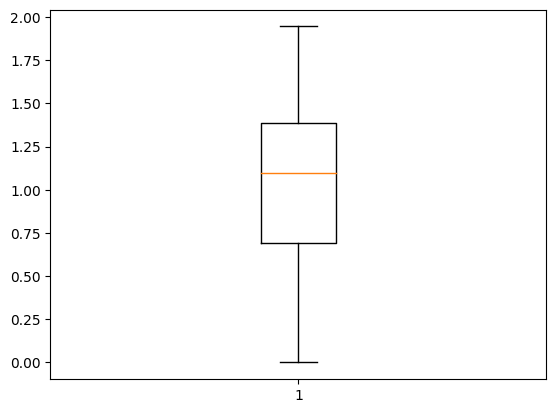

In [29]:
plt.boxplot(data['prop_count'])

In [10]:
data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0


In [11]:
data['adj_count']=np.log1p(data['adj_count'])
data['prop_count']=np.log1p(data['prop_count'])
data['noun_count']=np.log1p(data['noun_count'])
data['verb_count']=np.log1p(data['verb_count'])
data['stop_count']=np.log1p(data['stop_count'])

In [12]:
def text_to_vector(text, model):
    words = text.split()
    vectors = [model.get_word_vector(word) for word in words]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.get_dimension())

# Apply the function to the 'text' column and create a new 'vector' column
data['vector'] = data['clean_text'].apply(lambda x: text_to_vector(x, model))

# Display the DataFrame with the added 'vector' column
data

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,vector
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[-0.03186153, 0.02452956, -0.0013218527, 0.044..."
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[0.016472137, 0.0064482084, -0.04375116, 0.013..."
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.016047304, -0.15304023, -0.109592676, 0.01..."
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[-0.007804531, -0.0876125, -0.04109135, 0.0477..."
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.007837653, -0.13680357, -0.04498983, 0.023..."
...,...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,1.945910,1.098612,0.000000,0.000000,1.098612,"[-0.017481068, -0.0429005, -0.05866003, -0.011..."
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.000000,2.079442,0.693147,0.693147,1.386294,"[-0.004979699, 0.019668344, 0.03689998, -0.006..."
211,5,we approve crispr gene edit to treat sickle ce...,10,0.000000,1.609438,0.693147,1.386294,1.098612,"[0.067356035, 0.02052811, 0.016081484, 0.05782..."
212,5,sleep deprivation and vertigo here s how lack ...,13,0.000000,1.791759,0.693147,1.098612,1.791759,"[-0.018394284, -0.018012427, 0.0015333816, -0...."


In [13]:
np.ndim(data.vector)

1

In [14]:
len(data)

214

In [15]:
vector_columns = pd.DataFrame(data['vector'].to_list(), columns=[f'FastText{i}' for i in range(1,301)])
new_data= pd.concat([data, vector_columns], axis=1)

In [16]:
new_data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,vector,FastText1,...,FastText291,FastText292,FastText293,FastText294,FastText295,FastText296,FastText297,FastText298,FastText299,FastText300
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[-0.03186153, 0.02452956, -0.0013218527, 0.044...",-0.031862,...,0.045964,0.002109,-0.108481,-0.062529,-0.001618,0.030610,0.014262,0.199672,-0.043723,-0.027009
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[0.016472137, 0.0064482084, -0.04375116, 0.013...",0.016472,...,0.045847,-0.012616,-0.147013,0.000905,-0.014759,0.020232,-0.005564,0.038581,0.007761,0.016824
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.016047304, -0.15304023, -0.109592676, 0.01...",-0.016047,...,0.110236,0.016443,-0.233678,0.093457,-0.016795,-0.019170,0.027564,0.136602,-0.013027,0.016921
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[-0.007804531, -0.0876125, -0.04109135, 0.0477...",-0.007805,...,0.047368,-0.009170,-0.099289,0.044649,-0.021333,0.035181,0.005717,0.077402,-0.001515,-0.024147
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.007837653, -0.13680357, -0.04498983, 0.023...",-0.007838,...,0.067328,-0.007713,-0.183660,0.029005,-0.020335,-0.002785,-0.018614,0.095559,0.013170,-0.012252


In [17]:
X=new_data.drop(['label','word_count','vector','clean_text'],axis=1)
X

,prop_count,noun_count,adj_count,verb_count,stop_count,FastText1,FastText2,FastText3,FastText4,FastText5,...,FastText291,FastText292,FastText293,FastText294,FastText295,FastText296,FastText297,FastText298,FastText299,FastText300
0,1.386294,1.609438,0.693147,0.693147,1.791759,-0.031862,0.024530,-0.001322,0.044078,-0.028583,...,0.045964,0.002109,-0.108481,-0.062529,-0.001618,0.030610,0.014262,0.199672,-0.043723,-0.027009
1,0.693147,1.945910,0.693147,0.693147,1.609438,0.016472,0.006448,-0.043751,0.013029,0.018116,...,0.045847,-0.012616,-0.147013,0.000905,-0.014759,0.020232,-0.005564,0.038581,0.007761,0.016824
2,1.609438,1.386294,0.693147,0.693147,1.791759,-0.016047,-0.153040,-0.109593,0.016017,-0.004714,...,0.110236,0.016443,-0.233678,0.093457,-0.016795,-0.019170,0.027564,0.136602,-0.013027,0.016921
3,1.386294,1.791759,0.000000,1.098612,1.098612,-0.007805,-0.087613,-0.041091,0.047762,-0.021982,...,0.047368,-0.009170,-0.099289,0.044649,-0.021333,0.035181,0.005717,0.077402,-0.001515,-0.024147
4,1.791759,1.098612,1.098612,0.693147,1.386294,-0.007838,-0.136804,-0.044990,0.023762,-0.002129,...,0.067328,-0.007713,-0.183660,0.029005,-0.020335,-0.002785,-0.018614,0.095559,0.013170,-0.012252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.945910,1.098612,0.000000,0.000000,1.098612,-0.017481,-0.042900,-0.058660,-0.011284,0.023190,...,0.076743,-0.003684,-0.179308,0.075575,-0.003434,0.010267,-0.016423,0.047851,0.019217,0.030368
210,0.000000,2.079442,0.693147,0.693147,1.386294,-0.004980,0.019668,0.036900,-0.006876,0.014622,...,0.016761,0.025926,-0.114817,-0.055107,0.018112,-0.012746,0.003948,0.323757,-0.005539,-0.038410
211,0.000000,1.609438,0.693147,1.386294,1.098612,0.067356,0.020528,0.016081,0.057830,-0.019251,...,0.072377,0.044889,-0.116438,0.010946,-0.030471,0.042424,0.007422,0.158590,0.024703,0.033879
212,0.000000,1.791759,0.693147,1.098612,1.791759,-0.018394,-0.018012,0.001533,-0.017110,-0.013620,...,0.042597,0.012128,-0.107113,0.020727,-0.048957,-0.011201,-0.003144,0.050664,-0.003381,-0.001125


In [18]:
Y=new_data['label']

In [19]:
len(Y)

214

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from scipy.sparse import hstack, csr_matrix
# from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X , Y , test_size=0.1, random_state=42)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((192, 305), (22, 305), (192,), (22,))

In [32]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [33]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
train_pred=model.predict(x_train)

In [35]:
accuracy_score(y_train,train_pred)

0.9947916666666666

In [36]:
test_pred=model.predict(x_test)

In [37]:
accuracy_score(y_test,test_pred)

0.7727272727272727